# Hands On Machine Learning

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
df = pd.read_csv('housing-Copy1.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
cat = [f for f in df.columns if df.dtypes[f] == 'object']
num.remove('median_house_value')
tar = df['median_house_value'] # Target. What we want to predict

# Preview
20640 rows with 10 variables. 8 numeric and 1 categorical. *median_house_value* is what we are trying to predict.
- Numeric: 'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income'
- Categorical: 'ocean_proximity'
- Target: 'median_house_value'

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Target

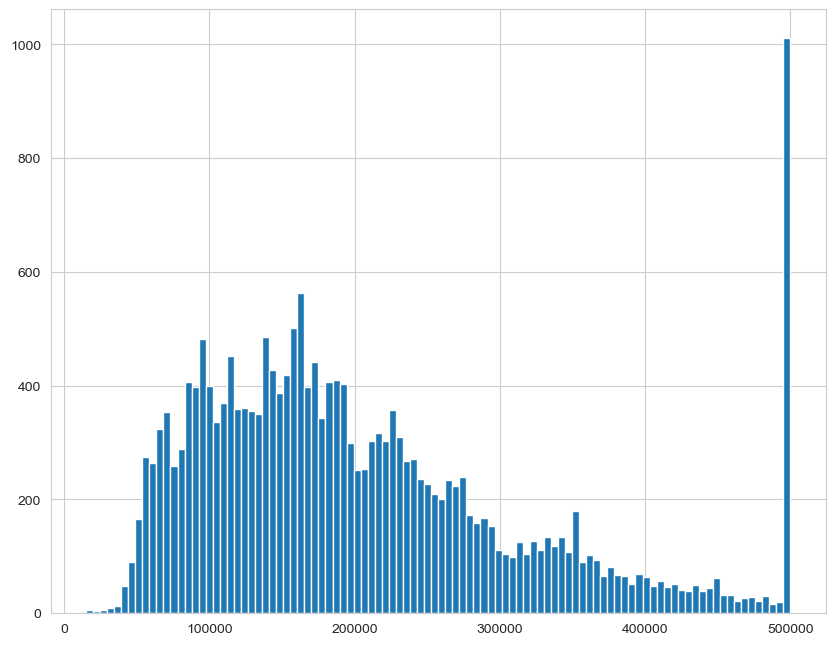

In [7]:
tar.hist(bins=100);

In [8]:
tar.describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

The **median_house_value** is our target and there is a cap in the target at 500,000.

Only total_bedrooms has missing values. We will use median to replace missing values.

# Create A Test Set
When splitting data, check first if there are similar groups you want to stratify to get an even random split.

In [9]:
## Group median income according to 5 categories
df['income_cat'] = np.ceil(df['median_income'] / 1.5)
df['income_cat'].where(df['income_cat'] < 5, 5.0, inplace=True)
num = num + ['income_cat']

In [10]:
## Using Startified Split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_cat']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [11]:
df.income_cat.value_counts() / len(df)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
train.income_cat.value_counts() / len(train)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [13]:
test.income_cat.value_counts() / len(test)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The _Test Set_ generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the _Test Set_ generated using purely random sampling is quite skewed.

You now have the Train dataset. From this point forward, all cleaning you do must be only done on Train. Test should not be touched because of it lead to overfitting when we come to evaluation.

# Explore Data
Start with checking correlations of numeric variables with the target data. Then make explore the data with many graphs but only show the top 3 graphs. Pairplot, scatterplot and a wildcard graph. Use only the train data in exploring.

## Correlations

In [14]:
train.corr()['median_house_value'].sort_values(ascending=False).reset_index().style.bar()

,index,median_house_value
0,median_house_value,1.000000
1,median_income,0.687160
2,income_cat,0.642274
3,total_rooms,0.135097
4,housing_median_age,0.114110
5,households,0.064506
6,total_bedrooms,0.047689
7,population,-0.026920
8,longitude,-0.047432
9,latitude,-0.142724


In [15]:
train.corr().sort_values(by = 'median_house_value', ascending=False).reset_index().style.bar()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
0,median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274
1,median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156
2,income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000
3,total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690
4,housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385
5,households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995
6,total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502
7,population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848
8,longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243
9,latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848


## 3 Graphs

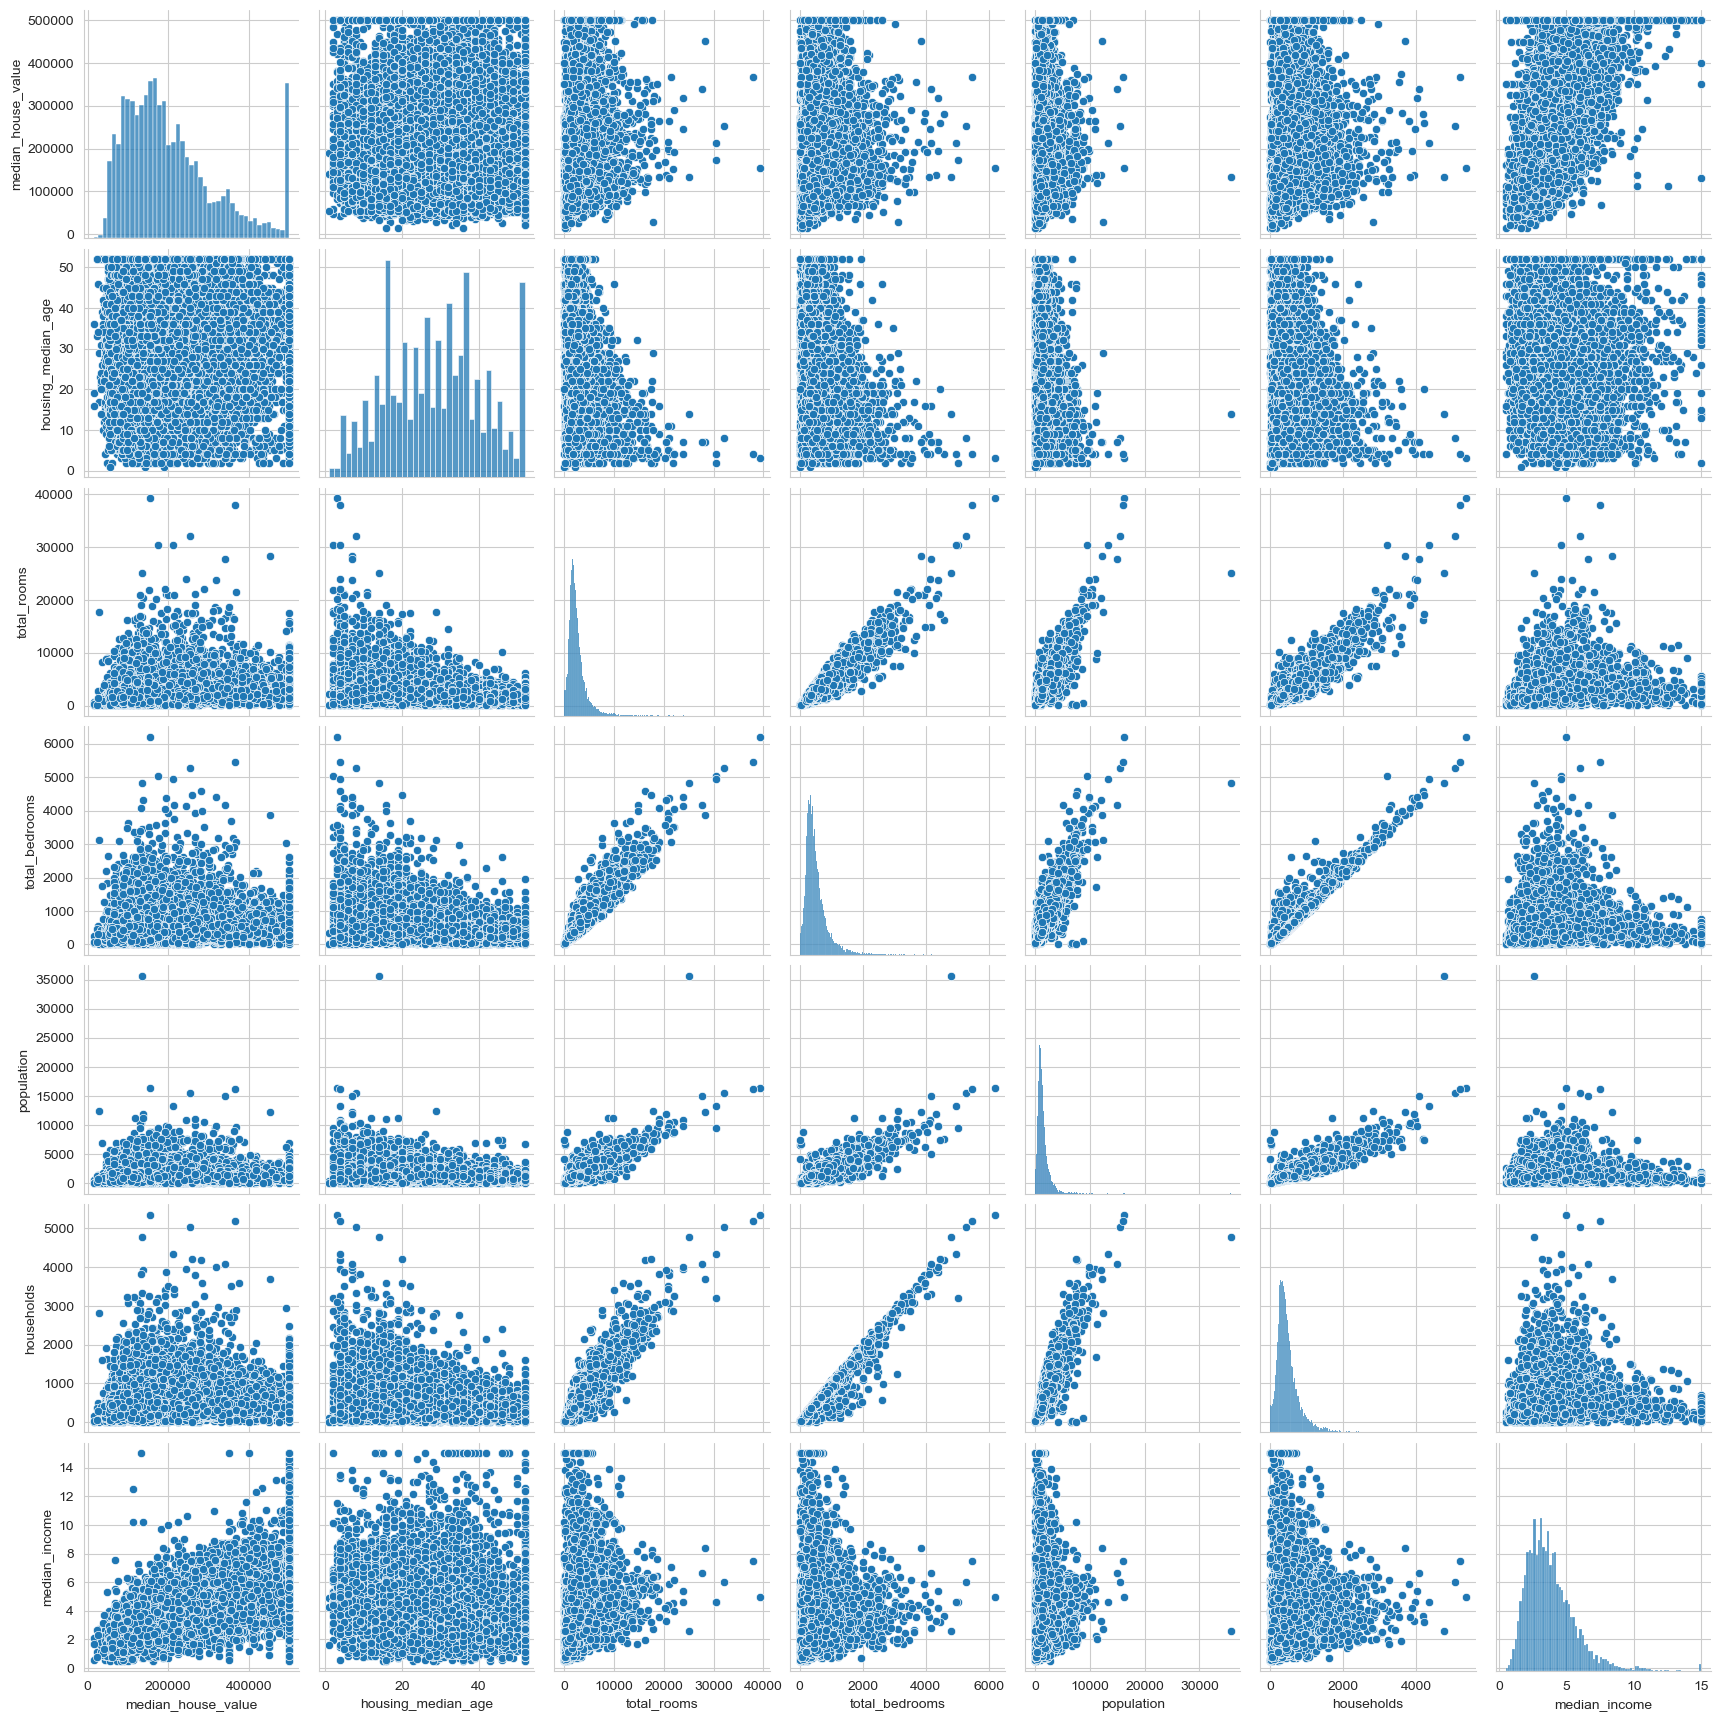

In [16]:
sns.pairplot(train[['median_house_value'] + num[2:-1]]);

Pairplot shows that there are features that correlates with other features. We can possibly combine them to have a much stronger feature that correlates with our target.

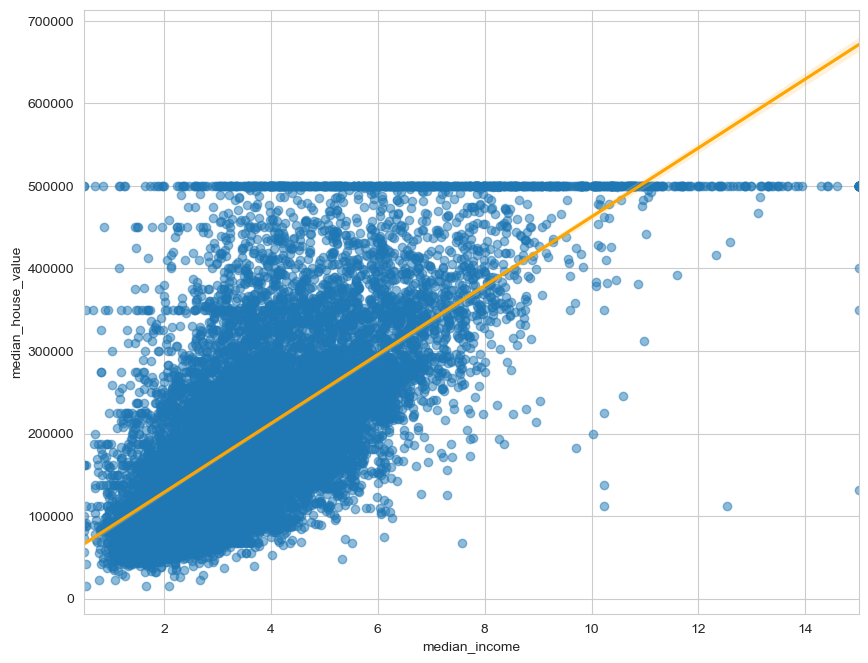

In [17]:
sns.regplot(x='median_income', y='median_house_value', data=train
            , scatter_kws={'alpha':0.5} , line_kws={"color": "orange"});

median income is the most correlated feature for our target. There are lines at 500k where we see the cap but there are also lines between 450k and 350k, which needs to be address before we fit our model.

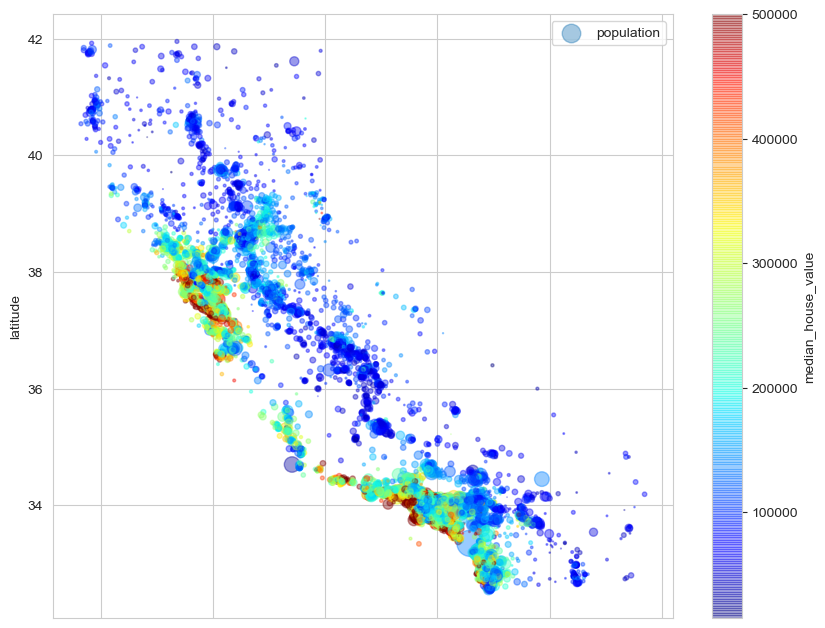

In [18]:
## Using Seaborn
# sns.relplot(x='longitude', y='latitude', data=train, hue='median_house_value'
#             , palette=plt.get_cmap('jet')
#             , size=train['population']/100, sizes=(50,500), alpha=0.3 );
## Using MatplotLib
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             s=train['population']/100, label='population', c='median_house_value', 
             cmap=plt.get_cmap('jet'), colorbar=True);

Housing prices are very much related to the location and the population density. Clustering algorithm to detect main clusters and add new features that measure the proximity to the cluster centers.

# Data Cleaning
After doing an initial exploration, you must clean the dataset but start doing it only on **train**. As you clean it, you will build a pipeline of functions that you will use to clean the test set and any future dataset.

## Missing Data
Assess each numerical values for missing data and use the imputer to replace them with the median value.

In [19]:
mis = train.isnull().sum()
mis = mis[mis>0]
pd.DataFrame({
    'count': mis,
    'proportion': mis / len(train)
}).sort_values(by='proportion', ascending=False).style.bar()

,count,proportion
total_bedrooms,158,0.009569


In [20]:
from sklearn.impute import SimpleImputer

In [21]:
imp_median = SimpleImputer(strategy='median')
imp_median.fit(train[num])


SimpleImputer(strategy='median')

In [22]:
pd.DataFrame(imp_median.transform(train[num]), columns=num).head() ## preview. can delete

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,2.0
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,5.0
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,2.0
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,2.0
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,3.0


Seems to be a lot of writing code for something simple. But here, we are getting used to *initiate, fit, transform* for sklearn, which will pay off in the long run once we build our automated pipeline.

## Categorical Encoding
For Categorical values, we need to encode them to zeros and ones.

In [23]:
# train = train.join(pd.get_dummies(train['ocean_proximity']))

In [24]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
encoder.fit_transform(train[cat])

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

When encoding, it seems strange that we don't care of the columne names and just have the values zeros and ones. This must have a purpose later on. Better keep moving.

## Feature Engineering
There will be some features that would have a weak relationship with the target but are strongly correlated with other weak features. Exploring the combination of these features by combining them together may result into a stronger feature that we can use to improve our predictive capability of the target.

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [48]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False) # initiate
housing_extra_attributes = attr_adder.transform(train.values) # transform

The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more lifely that you will find a great combination.

## Feature Scaling
Total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15.


### MinMaxScaler Normalization
Transforms the numeric data between 0 and 1.

In [53]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # initiate
scaler.fit(train[num]) # fit
minmax = scaler.transform(train[num]) # transform
pd.DataFrame(minmax, columns=num).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,0.475515,0.329392,0.542218,0.066560,0.085853,0.039709,0.092431,0.232803,0.501635
std,0.199388,0.227211,0.246563,0.054394,0.066479,0.031270,0.070150,0.131374,0.263651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.148778,0.333333,0.036552,0.047197,0.021890,0.051718,0.142541,0.250000
50%,0.581673,0.182784,0.549020,0.053759,0.069427,0.032540,0.075803,0.209721,0.500000
75%,0.631474,0.550478,0.705882,0.079743,0.103415,0.048103,0.112024,0.292725,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Standardization
Uses standard deviation with mean as zero.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train[num])
pd.DataFrame(scaler.transform(train[num]), columns=num).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635400e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.272678e-15,2.275755e-15,-2.700521e-16,8.606884e-17,8.031025e-18,-4.347735e-17,9.614940e-18,-2.241021e-16,8.094812e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.291474e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00,-1.902710e+00
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.814921e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01,-9.544560e-01
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.470978e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01,-6.202241e-03
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.641863e-01,2.684162e-01,2.793106e-01,4.561338e-01,9.420515e-01
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.375142e+01,3.071047e+01,1.293803e+01,5.839969e+00,1.890305e+00


You must only *fit* scalers to the **train** data. You must fit it to the whole data set or to the test set because this will cause overfitting when we do evaluation.

# Transformation Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelBinarizer

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
df.head()

In [ ]:
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num))
    , ('imputer', SimpleImputer(strategy='median'))
#     , ('attribs_adder', CombinedAttributesAdder())
    , ('std_scaler', StandardScaler())
])

In [ ]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat))
    , ('label_binarizer', LabelBinarizer())
])

In [ ]:
full_pipeline = FeatureUnion(transformer_list = [
    ('num_pipeline', num_pipeline)
    , ('cat_pipeline', cat_pipeline)
])

In [ ]:
pd.DataFrame(num_pipeline.fit_transform(df), columns=num)

In [ ]:
pd.DataFrame(cat_pipeline.fit_transform(df), columns=cat)

In [ ]:
df.shape

In [ ]:
full_pipeline.fit_transform(df)

# Machine Learning

In [ ]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing

In [ ]:
housing_labels = strat_train_set['median_house_value'].copy()
housing_labels

# Data Cleaning

In [ ]:
median = housing['total_bedrooms'].median()

In [ ]:
median

In [ ]:
housing.loc[housing['total_bedrooms'].isnull()]

In [ ]:
housing['total_bedrooms'].fillna(median, inplace=True)

### Imputer

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
imputer